In [71]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold

In [72]:
base = pd.read_csv("../Base.csv")

In [73]:
base.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [74]:
base["payment_type"].unique()

array(['AA', 'AD', 'AB', 'AC', 'AE'], dtype=object)

In [75]:
base.groupby("fraud_bool")["fraud_bool"].count()

fraud_bool
0    988971
1     11029
Name: fraud_bool, dtype: int64

In [76]:
base

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


## Feature Engineering

In [77]:
X = base.loc[ : , base.columns != 'fraud_bool']

In [78]:
y = base[['fraud_bool']]

In [79]:
X.shape, y.shape

((1000000, 31), (1000000, 1))

### Scaling

In [80]:
# categorical columns with numeric dtype (Either binary or month)
binary_cols = [ 'email_is_free', 'phone_home_valid', 'phone_mobile_valid','has_other_cards', 'foreign_request','keep_alive_session','month']
# change dtype to object
X[binary_cols] = X[binary_cols].astype(object)

C:\Users\User\AppData\Local\Temp\ipykernel_23252\3556639145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[binary_cols] = X[binary_cols].astype(object)


In [81]:
X

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,6732.602414,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,1574.293294,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,1258.864938,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,7048.137128,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


In [82]:
numeric_cols = X.select_dtypes(include=['int', 'float']).columns

In [83]:
#Feature engineering - scaling
scaler = MinMaxScaler()

# Apply Min-Max Scaling to all numeric columns in X
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X

C:\Users\User\AppData\Local\Temp\ipykernel_23252\114319198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0.250,0.986507,0.000000,0.060606,0.375,0.000086,0.918255,AA,0.157934,0.785651,...,0,0.685864,0,INTERNET,0.198216,linux,1,0.666667,0.0,0
1,0.875,0.617426,0.000000,0.209790,0.125,0.000129,0.114260,AD,0.247350,0.556307,...,0,0.685864,0,INTERNET,0.050217,other,1,0.666667,0.0,0
2,0.875,0.996708,0.026042,0.034965,0.375,0.000157,0.109273,AB,0.163308,0.274904,...,0,0.005236,0,INTERNET,0.273082,windows,0,0.666667,0.0,0
3,0.625,0.475100,0.031250,0.034965,0.250,0.000089,0.106372,AB,0.519779,0.864767,...,0,0.005236,0,INTERNET,0.186605,linux,1,0.666667,0.0,0
4,1.000,0.842307,0.000000,0.069930,0.375,0.073195,0.487853,AA,0.349007,0.460265,...,0,0.005236,0,INTERNET,0.054581,other,0,0.666667,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.875,0.124689,0.000000,0.335664,0.250,0.000654,0.114442,AB,0.078967,0.408808,...,0,0.685864,0,INTERNET,0.206766,other,0,0.666667,0.0,7
999996,1.000,0.824545,0.000000,0.452214,0.250,0.000122,0.120937,AC,0.060755,0.103333,...,1,0.424084,0,INTERNET,0.028816,macintosh,0,0.666667,0.0,7
999997,0.875,0.140890,0.000000,0.473193,0.000,0.000756,0.514763,AA,0.111658,0.084653,...,0,0.005236,0,INTERNET,0.196418,other,0,0.666667,0.0,7
999998,1.000,0.002479,0.138021,0.009324,0.250,0.000298,0.110650,AB,0.105389,0.427494,...,0,0.005236,0,INTERNET,0.027373,linux,1,0.666667,0.0,7


### Pearson Correlation - detect mutlicollinearity

In [84]:
import pandas as pd
import numpy as np

# Calculate the Pearson correlation coefficients
correlation_matrix = X.corr(method='pearson')

# Get the absolute values of the correlation coefficients
correlation_matrix_abs = correlation_matrix.abs()

# Select upper triangle of correlation matrix (excluding diagonal)
upper_triangle = correlation_matrix_abs.where(
    np.triu(np.ones(correlation_matrix_abs.shape), k=1).astype(np.bool_))

# Find features with correlation greater than a threshold
threshold = 0.85  # Example threshold
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Print highly correlated features
print("Highly Correlated Features:")
print(high_correlation_features)     #None

C:\Users\User\AppData\Local\Temp\ipykernel_23252\4142129346.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr(method='pearson')


Highly Correlated Features:
[]


### Variance Threshold

In [85]:
vt = VarianceThreshold(threshold=0.0)

# Fit the VarianceThreshold to the selected numeric columns in X
vt.fit(X[numeric_cols])

# Get the boolean mask of selected numeric features
selected_numeric_mask = vt.get_support()

# Get the names of the selected numeric features
selected_numeric_features = X[numeric_cols].columns[selected_numeric_mask]

# Filter X to keep only selected numeric features
X_numeric_selected = X[selected_numeric_features]
#device_fraud_count is dropped 

# Get the remaining categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Combine selected numeric features with categorical columns
X_selected = pd.concat([X_numeric_selected, X[categorical_cols]], axis=1)
X = X_selected
X

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,source,device_os,keep_alive_session,month
0,0.250,0.986507,0.000000,0.060606,0.375,0.000086,0.918255,0.157934,0.785651,0.798218,...,1,BC,0,1,0,0,INTERNET,linux,1,0
1,0.875,0.617426,0.000000,0.209790,0.125,0.000129,0.114260,0.247350,0.556307,0.541631,...,1,BC,1,1,0,0,INTERNET,other,1,0
2,0.875,0.996708,0.026042,0.034965,0.375,0.000157,0.109273,0.163308,0.274904,0.508333,...,1,BC,0,1,0,0,INTERNET,windows,0,0
3,0.625,0.475100,0.031250,0.034965,0.250,0.000089,0.106372,0.519779,0.864767,0.664714,...,1,BC,0,1,0,0,INTERNET,linux,1,0
4,1.000,0.842307,0.000000,0.069930,0.375,0.073195,0.487853,0.349007,0.460265,0.465935,...,0,BC,1,1,0,0,INTERNET,other,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.875,0.124689,0.000000,0.335664,0.250,0.000654,0.114442,0.078967,0.408808,0.208338,...,1,BB,1,1,0,0,INTERNET,other,0,7
999996,1.000,0.824545,0.000000,0.452214,0.250,0.000122,0.120937,0.060755,0.103333,0.172567,...,0,BA,1,1,1,0,INTERNET,macintosh,0,7
999997,0.875,0.140890,0.000000,0.473193,0.000,0.000756,0.514763,0.111658,0.084653,0.280386,...,1,BE,0,1,0,0,INTERNET,other,0,7
999998,1.000,0.002479,0.138021,0.009324,0.250,0.000298,0.110650,0.105389,0.427494,0.636207,...,0,BD,0,1,0,0,INTERNET,linux,1,7


### One Hot Encoding

In [86]:
# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Select categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Fit and transform the selected columns with OneHotEncoder
encoded_cols = onehot_encoder.fit_transform(X[categorical_cols]).toarray()

# Get the feature names for the new one-hot encoded columns
# feature_names = onehot_encoder.get_feature_names(categorical_cols)
feature_names = onehot_encoder.get_feature_names_out(categorical_cols)

# Create a DataFrame from the one-hot encoded columns
X_encoded = pd.DataFrame(encoded_cols, columns=feature_names)

# Replace the original columns with the one-hot encoded columns (optional)
X.drop(columns=categorical_cols, inplace=True)
X = pd.concat([X, X_encoded], axis=1)

In [87]:
X

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,keep_alive_session_0,keep_alive_session_1,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7
0,0.250,0.986507,0.000000,0.060606,0.375,0.000086,0.918255,0.157934,0.785651,0.798218,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.875,0.617426,0.000000,0.209790,0.125,0.000129,0.114260,0.247350,0.556307,0.541631,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.875,0.996708,0.026042,0.034965,0.375,0.000157,0.109273,0.163308,0.274904,0.508333,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.625,0.475100,0.031250,0.034965,0.250,0.000089,0.106372,0.519779,0.864767,0.664714,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000,0.842307,0.000000,0.069930,0.375,0.073195,0.487853,0.349007,0.460265,0.465935,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.875,0.124689,0.000000,0.335664,0.250,0.000654,0.114442,0.078967,0.408808,0.208338,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
999996,1.000,0.824545,0.000000,0.452214,0.250,0.000122,0.120937,0.060755,0.103333,0.172567,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
999997,0.875,0.140890,0.000000,0.473193,0.000,0.000756,0.514763,0.111658,0.084653,0.280386,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
999998,1.000,0.002479,0.138021,0.009324,0.250,0.000298,0.110650,0.105389,0.427494,0.636207,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Feature Selection

In [24]:
#from sklearn.linear_model import Lasso
#import pandas as pd

# Initialize the Lasso model with a chosen alpha
#lasso = Lasso(alpha=0.001)  # Adjust the alpha value as needed

# Fit the Lasso model to the training data
#lasso.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
#feature_names = X_train.columns
#lasso_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso.coef_})

# Filter the features with non-zero coefficients
#selected_features = lasso_coefficients[lasso_coefficients['Coefficient'] != 0]['Feature']
#print(selected_features)

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the estimator (e.g., Logistic Regression)
estimator = LogisticRegression()

# Initialize RFE with the estimator and number of features to select
rfe = RFE(estimator, n_features_to_select=35)  # Adjust number of features as needed

# Fit RFE 
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

print(selected_features)


/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'zip_count_4w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'proposed_credit_limit', 'device_distinct_emails_8w', 'payment_type_AA',
       'payment_type_AB', 'payment_type_AD', 'payment_type_AE',
       'employment_status_CB', 'employment_status_CD', 'employment_status_CE',
       'employment_status_CF', 'email_is_free_0', 'email_is_free_1',
       'housing_status_BA', 'phone_home_valid_1', 'phone_mobile_valid_0',
       'phone_mobile_valid_1', 'has_other_cards_1', 'foreign_request_0',
       'foreign_request_1', 'source_INTERNET', 'source_TELEAPP',
       'device_os_linux', 'device_os_other', 'device_os_windows',
       'keep_alive_session_1', 'month_3'],
      dtype='object')


/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
#the top 35 features (idk a rough gauge)
columns_to_keep = ['income', 'name_email_similarity', 'prev_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'zip_count_4w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'proposed_credit_limit', 'device_distinct_emails_8w', 'payment_type_AA',
       'payment_type_AB', 'payment_type_AD', 'payment_type_AE',
       'employment_status_CB', 'employment_status_CD', 'employment_status_CE',
       'employment_status_CF', 'email_is_free_0', 'email_is_free_1',
       'housing_status_BA', 'phone_home_valid_1', 'phone_mobile_valid_0',
       'phone_mobile_valid_1', 'has_other_cards_1', 'foreign_request_0',
       'foreign_request_1', 'source_INTERNET', 'source_TELEAPP',
       'device_os_linux', 'device_os_other', 'device_os_windows',
       'keep_alive_session_1', 'month_3']
X = X[columns_to_keep]

In [27]:
X

,income,name_email_similarity,prev_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,date_of_birth_distinct_emails_4w,credit_risk_score,proposed_credit_limit,...,has_other_cards_1,foreign_request_0,foreign_request_1,source_INTERNET,source_TELEAPP,device_os_linux,device_os_other,device_os_windows,keep_alive_session_1,month_3
0,0.250,0.986507,0.000000,0.375,0.000086,0.918255,0.157934,0.128205,0.595707,0.685864,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.875,0.617426,0.000000,0.125,0.000129,0.114260,0.247350,0.461538,0.579606,0.685864,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.875,0.996708,0.026042,0.375,0.000157,0.109273,0.163308,0.282051,0.463327,0.005236,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.625,0.475100,0.031250,0.250,0.000089,0.106372,0.519779,0.333333,0.465116,0.005236,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.000,0.842307,0.000000,0.375,0.073195,0.487853,0.349007,0.153846,0.466905,0.005236,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.875,0.124689,0.000000,0.250,0.000654,0.114442,0.078967,0.205128,0.849732,0.685864,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
999996,1.000,0.824545,0.000000,0.250,0.000122,0.120937,0.060755,0.128205,0.724508,0.424084,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
999997,0.875,0.140890,0.000000,0.000,0.000756,0.514763,0.111658,0.076923,0.652952,0.005236,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
999998,1.000,0.002479,0.138021,0.250,0.000298,0.110650,0.105389,0.205128,0.568873,0.005236,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


### Train Test Split

In [88]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test


In [ ]:
X_train.shape

(700000, 31)

## Resampling

In [89]:
ratio = y.fraud_bool.value_counts() / len(y) * 100
print(f'% of non-fraud class in y: {round(ratio[0],3)}%\n% of fraud class in y: {round(ratio[1],3)}%\n')

ratio_train = y_train.fraud_bool.value_counts() / len(y_train) * 100
print(f'% of non-fraud class in y_train: {round(ratio_train[0],3)}%\n% of fraud class in y_train: {round(ratio_train[1],3)}%\n')

ratio_test = y_test.fraud_bool.value_counts() / len(y_test) * 100
print(f'% of non-fraud class in y_test: {round(ratio_test[0],3)}%\n% of fraud class in y_test: {round(ratio_test[1],3)}%')


% of non-fraud class in y: 98.897%
% of fraud class in y: 1.103%

% of non-fraud class in y_train: 98.892%
% of fraud class in y_train: 1.108%

% of non-fraud class in y_test: 98.909%
% of fraud class in y_test: 1.091%


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 64 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   income                            1000000 non-null  float64
 1   name_email_similarity             1000000 non-null  float64
 2   prev_address_months_count         1000000 non-null  float64
 3   current_address_months_count      1000000 non-null  float64
 4   customer_age                      1000000 non-null  float64
 5   days_since_request                1000000 non-null  float64
 6   intended_balcon_amount            1000000 non-null  float64
 7   zip_count_4w                      1000000 non-null  float64
 8   velocity_6h                       1000000 non-null  float64
 9   velocity_24h                      1000000 non-null  float64
 10  velocity_4w                       1000000 non-null  float64
 11  bank_branch_count_8w              1000

### Individual Resample

#### Random Undersample

In [92]:
%%time
from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE

desired_majority_size = int(0.5 * len(X_train))  # 50% of the original majority class size

# Initialize RandomUnderSampler to undersample the majority class to 50%
under_sampler = RandomUnderSampler(sampling_strategy={0: desired_majority_size}, random_state=42)

# Apply RandomUnderSampler
Xt_resampled_under, yt_resampled_under = under_sampler.fit_resample(X_train, y_train)

# Initialize SMOTE to oversample the minority class to match the majority class
# smote = SMOTE(sampling_strategy='auto', random_state=42)

# # Apply SMOTE on the undersampled data
# Xt_resampled, yt_resampled = smote.fit_resample(Xt_resampled_under, yt_resampled_under)

tmp = yt_resampled_under.fraud_bool.value_counts() / len(yt_resampled_under) * 100
print(f'% of non-fraud class in resampled data: {round(tmp[0],3)}%\n% of fraud class in resampled data: {round(tmp[1],3)}%')

% of non-fraud class in resampled data: 97.832%
% of fraud class in resampled data: 2.168%
CPU times: total: 531 ms
Wall time: 971 ms


#### Tomek Links

In [91]:
%%time
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
Xt_resampled_tl, yt_resampled_tl = tl.fit_resample(X_train, y_train)

ratio_tl = yt_resampled_tl.fraud_bool.value_counts() / len(yt_resampled_tl) * 100
print(f'% of non-fraud class in resampled data: {round(ratio_tl[0],3)}%\n% of fraud class in resampled data: {round(ratio_tl[1],3)}%')

% of non-fraud class in resampled data: 98.887%
% of fraud class in resampled data: 1.113%
CPU times: total: 57min 14s
Wall time: 25min 31s


#### Cluster Centroid

can tune estimator -- default is KMeans

In [33]:
# %%time
# from imblearn.under_sampling import ClusterCentroids
# cc = ClusterCentroids(random_state = 42)
# Xt_resampled_cc, yt_resampled_cc = cc.fit_resample(X_train, y_train)

# ratio_cc = yt_resampled_cc.fraud_bool.value_counts() / len(yt_resampled_cc) * 100
# print(f'% of non-fraud class in resampled data: {round(ratio_cc[0],3)}%\n% of fraud class in resampled data: {round(ratio_cc[1],3)}%')

KeyboardInterrupt: 

#### SMOTE

In [93]:
%%time
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, sampling_strategy = 0.666) #ratio of minority:majority 40:60

Xt_resampled_SMOTE, yt_resampled_SMOTE = smote.fit_resample(X_train, y_train)

ratio_SMOTE = yt_resampled_SMOTE.fraud_bool.value_counts() / len(yt_resampled_SMOTE) * 100
print(f'% of non-fraud class in resampled data: {round(ratio_SMOTE[0],3)}%\n% of fraud class in resampled data: {round(ratio_SMOTE[1],3)}%')

% of non-fraud class in resampled data: 60.024%
% of fraud class in resampled data: 39.976%
CPU times: total: 2.61 s
Wall time: 5.76 s


#### ADASYN

In [94]:
%%time
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42, sampling_strategy = 0.666)
Xt_resampled_adasyn, yt_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

ratio_adasyn = yt_resampled_adasyn.fraud_bool.value_counts() / len(yt_resampled_adasyn) * 100
print(f'% of non-fraud class in resampled data: {round(ratio_adasyn[0],3)}%\n% of fraud class in resampled data: {round(ratio_adasyn[1],3)}%')

% of non-fraud class in resampled data: 59.939%
% of fraud class in resampled data: 40.061%
CPU times: total: 41.2 s
Wall time: 30 s


#### Evaluate Individual Resampling Methods

evaluation metrics to use:
1. precision
2. recall
3. F2, F1.5, F1
3. TPR, FNR
4. PR-AUC

https://sinyi-chou.github.io/python-sklearn-precision-recall/ 

In [100]:
accuracies = {}
f2_scores = {}
f15_scores = {}
f1_scores = {}
recall_scores = {}
precision_scores = {}
class_reports = {}
pr_auc = {}
pr_auc_pts = {}
tpr = {}
fnr = {}

In [98]:
#models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

logistic = LogisticRegression(random_state=42)
# svm = SVC(kernel='linear', random_state=42)
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [157]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, fbeta_score, f1_score, average_precision_score, precision_recall_curve, confusion_matrix
def evaluate_results(model,resampler,x_resampled, y_resampled):

    model.fit(x_resampled, y_resampled)

    y_pred_test = model.predict(X_test)

    accuracies[resampler] = accuracy_score(y_test, y_pred_test)
    class_reports[resampler] = classification_report(y_test, y_pred_test)
    recall_scores[resampler] = recall_score(y_test, y_pred_test)
    precision_scores[resampler] = precision_score(y_test, y_pred_test)
    f2_scores[resampler] = fbeta_score(y_test, y_pred_test, beta =2)
    f15_scores[resampler] = fbeta_score(y_test, y_pred_test, beta =1.5)
    f1_scores[resampler] = f1_score(y_test, y_pred_test)
    pr_auc[resampler] = average_precision_score(y_test, y_pred_test)
    pr_auc_pts[resampler] = precision_recall_curve(y_test, y_pred_test)
    
    cm = confusion_matrix(y_test, y_pred_test)
    TP = np.diag(cm).astype(float)
    FN = (cm.sum(axis=1) -np.diag(cm)).astype(float)
    TPR = TP/(TP+FN)
    FNR = FN/(TP+FN)
    tpr[resampler] = TPR
    fnr[resampler] = FNR
    # print(cm)
    # print(TP,FN)
    # print(TPR, FNR)

    print(f"{resampler} Model Performance on Test Data:")
    print(f"{resampler} Accuracy:", accuracies[resampler])
    print(f"{resampler} Precision: {precision_scores[resampler]}")
    print(f"{resampler} Recall: {recall_scores[resampler]}")
    print(f"{resampler} F2: {f2_scores[resampler]}")
    print(f"{resampler} F1.5: {f15_scores[resampler]}")
    print(f"{resampler} F1: {f1_scores[resampler]}")
    print(f"{resampler} PR-AUC: {pr_auc[resampler]}")
    print(f"{resampler} Classification Report: \n{class_reports[resampler]}")
    # print(classification_report(y_test, y_pred_test),'\n')

In [111]:
evaluate_results(logistic,"Random Undersample",Xt_resampled_under, yt_resampled_under)
evaluate_results(logistic,"Tomek Links",Xt_resampled_tl, yt_resampled_tl)
#evaluate_results(logistic,"Cluster Centroid",Xt_resampled_cc, yt_resampled_cc)
evaluate_results(logistic,"SMOTE",Xt_resampled_SMOTE, yt_resampled_SMOTE)
evaluate_results(logistic,"ADASYN",Xt_resampled_adasyn, yt_resampled_adasyn)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Undersample Model Performance on Test Data:
Random Undersample Accuracy: 0.9888933333333333
Random Undersample Precision: 0.4121212121212121
Random Undersample Recall: 0.04153940134392181
Random Undersample F2: 0.05064799642484731
Random Undersample F1.5: 0.05742870135776002
Random Undersample F1: 0.07547169811320754
Random Undersample PR-AUC: 0.027579268432646565
Random Undersample Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    296726
           1       0.41      0.04      0.08      3274

    accuracy                           0.99    300000
   macro avg       0.70      0.52      0.53    300000
weighted avg       0.98      0.99      0.98    300000



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tomek Links Model Performance on Test Data:
Tomek Links Accuracy: 0.98909
Tomek Links Precision: 0.5081967213114754
Tomek Links Recall: 0.009468540012217471
Tomek Links F2: 0.011780801094474424
Tomek Links F1.5: 0.013564456411982498
Tomek Links F1: 0.018590704647676162
Tomek Links PR-AUC: 0.015621880989815439
Tomek Links Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    296726
           1       0.51      0.01      0.02      3274

    accuracy                           0.99    300000
   macro avg       0.75      0.50      0.51    300000
weighted avg       0.98      0.99      0.98    300000



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SMOTE Model Performance on Test Data:
SMOTE Accuracy: 0.8654733333333333
SMOTE Precision: 0.05558218685585543
SMOTE Recall: 0.7083078802687843
SMOTE F2: 0.21151811448794192
SMOTE F1.5: 0.1535339234240199
SMOTE F1: 0.10307582896257445
SMOTE PR-AUC: 0.04255263428590778
SMOTE Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    296726
           1       0.06      0.71      0.10      3274

    accuracy                           0.87    300000
   macro avg       0.53      0.79      0.52    300000
weighted avg       0.99      0.87      0.92    300000



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ADASYN Model Performance on Test Data:
ADASYN Accuracy: 0.8606966666666667
ADASYN Precision: 0.05423234497604333
ADASYN Recall: 0.7156383628588882
ADASYN F2: 0.20808540116165475
ADASYN F1.5: 0.1505798949959956
ADASYN F1: 0.10082406351528714
ADASYN PR-AUC: 0.04191407990598743
ADASYN Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    296726
           1       0.05      0.72      0.10      3274

    accuracy                           0.86    300000
   macro avg       0.53      0.79      0.51    300000
weighted avg       0.99      0.86      0.92    300000



In [ ]:
#evaluate_results(svm,"Random Undersample",Xt_resampled_under, yt_resampled_under)
#evaluate_results(svm,"Tomek Links",Xt_resampled_tl, yt_resampled_tl)
#evaluate_results(svm,"Cluster Centroid",Xt_resampled_cc, yt_resampled_cc)
#evaluate_results(svm,"SMOTE",Xt_resampled_SMOTE, yt_resampled_SMOTE)
#evaluate_results(svm,"ADASYN",Xt_resampled_adasyn, yt_resampled_adasyn)

/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-pa

Random Undersample Model Performance on Test Data:
Random Undersample Accuracy: 0.9890866666666667
Random Undersample Classification Report:


/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    296726
           1       0.00      0.00      0.00      3274

    accuracy                           0.99    300000
   macro avg       0.49      0.50      0.50    300000
weighted avg       0.98      0.99      0.98    300000
 



/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-pa

Tomek Links Model Performance on Test Data:
Tomek Links Accuracy: 0.9890866666666667
Tomek Links Classification Report:


/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    296726
           1       0.00      0.00      0.00      3274

    accuracy                           0.99    300000
   macro avg       0.49      0.50      0.50    300000
weighted avg       0.98      0.99      0.98    300000
 



/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
# evaluate_results(rf_classifier,"Random Undersample",Xt_resampled_under, yt_resampled_under)
# evaluate_results(rf_classifier,"Tomek Links",Xt_resampled_tl, yt_resampled_tl)
# #evaluate_results(rf,"Cluster Centroid",Xt_resampled_cc, yt_resampled_cc)
# evaluate_results(rf_classifier,"SMOTE",Xt_resampled_SMOTE, yt_resampled_SMOTE)
# evaluate_results(rf_classifier,"ADASYN",Xt_resampled_adasyn, yt_resampled_adasyn)

/var/folders/qh/_yq9t4tx45lcx3h89_ggmdm00000gn/T/ipykernel_22624/529661186.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_resampled, y_resampled)


Random Undersample Model Performance on Test Data:
Random Undersample Accuracy: 0.9891233333333334
Random Undersample Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    296726
           1       0.54      0.02      0.05      3274

    accuracy                           0.99    300000
   macro avg       0.76      0.51      0.52    300000
weighted avg       0.98      0.99      0.98    300000
 



/var/folders/qh/_yq9t4tx45lcx3h89_ggmdm00000gn/T/ipykernel_22624/529661186.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_resampled, y_resampled)


KeyboardInterrupt: 

### Combined Undersample + Oversample

#### Undersampling methods + SMOTE

In [186]:
def undersample_smote(undersampler, X_undersampled, y_undersampled):
    smote = SMOTE(random_state=42, sampling_strategy = 0.666)

    # Apply SMOTE on the undersampled data
    Xt_resampled, yt_resampled = smote.fit_resample(X_undersampled, y_undersampled)

    tmp = yt_resampled.fraud_bool.value_counts() / len(yt_resampled) * 100
    print(f'{undersampler}:\n% of non-fraud class in resampled data: {round(tmp[0],3)}%\n% of fraud class in resampled data: {round(tmp[1],3)}%')
    
    evaluate_results(logistic, undersampler+' + SMOTE',Xt_resampled, yt_resampled)

In [187]:
undersample_smote('Random Undersample',Xt_resampled_under, yt_resampled_under)

Random Undersample:
% of non-fraud class in resampled data: 60.024%
% of fraud class in resampled data: 39.976%


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Undersample + SMOTE Model Performance on Test Data:
Random Undersample + SMOTE Accuracy: 0.8653166666666666
Random Undersample + SMOTE Precision: 0.05554092552249168
Random Undersample + SMOTE Recall: 0.708613317043372
Random Undersample + SMOTE F2: 0.21142034374031748
Random Undersample + SMOTE F1.5: 0.15344696006105316
Random Undersample + SMOTE F1: 0.10300810300810301
Random Undersample + SMOTE PR-AUC: 0.04253703946615171
Random Undersample + SMOTE Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    296726
           1       0.06      0.71      0.10      3274

    accuracy                           0.87    300000
   macro avg       0.53      0.79      0.52    300000
weighted avg       0.99      0.87      0.92    300000



In [188]:
undersample_smote('Tomek Links', Xt_resampled_tl, yt_resampled_tl)

Tomek Links:
% of non-fraud class in resampled data: 60.024%
% of fraud class in resampled data: 39.976%


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tomek Links + SMOTE Model Performance on Test Data:
Tomek Links + SMOTE Accuracy: 0.8644533333333333
Tomek Links + SMOTE Precision: 0.0552198325085649
Tomek Links + SMOTE Recall: 0.7089187538179597
Tomek Links + SMOTE F2: 0.21051008561892323
Tomek Links + SMOTE F1.5: 0.152702005121613
Tomek Links + SMOTE F1: 0.10245883547433011
Tomek Links + SMOTE PR-AUC: 0.042323041514674954
Tomek Links + SMOTE Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    296726
           1       0.06      0.71      0.10      3274

    accuracy                           0.86    300000
   macro avg       0.53      0.79      0.51    300000
weighted avg       0.99      0.86      0.92    300000



In [ ]:
#undersample_smote('Cluster Centroid', Xt_resampled_cc, yt_resampled_cc)

#### Undersampling methods + ADASYN

In [189]:
def undersample_adasyn(undersampler, X_undersampled, y_undersampled):
    adasyn = ADASYN(random_state=42, sampling_strategy = 0.666)

    # Apply SMOTE on the undersampled data
    Xt_resampled, yt_resampled = adasyn.fit_resample(X_undersampled, y_undersampled)

    tmp = yt_resampled.fraud_bool.value_counts() / len(yt_resampled) * 100
    print(f'{undersampler}:\n% of non-fraud class in resampled data: {round(tmp[0],3)}%\n% of fraud class in resampled data: {round(tmp[1],3)}%')
    
    evaluate_results(logistic, undersampler+' + ADASYN',Xt_resampled, yt_resampled)

In [190]:
undersample_adasyn('Random Undersample',Xt_resampled_under, yt_resampled_under)

Random Undersample:
% of non-fraud class in resampled data: 59.939%
% of fraud class in resampled data: 40.061%


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Undersample + ADASYN Model Performance on Test Data:
Random Undersample + ADASYN Accuracy: 0.8578966666666666
Random Undersample + ADASYN Precision: 0.05370466967545869
Random Undersample + ADASYN Recall: 0.7232742822235797
Random Undersample + ADASYN F2: 0.2070328209970449
Random Undersample + ADASYN F1.5: 0.14955450402743906
Random Undersample + ADASYN F1: 0.09998522177887559
Random Undersample + ADASYN PR-AUC: 0.04186320641157183
Random Undersample + ADASYN Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    296726
           1       0.05      0.72      0.10      3274

    accuracy                           0.86    300000
   macro avg       0.53      0.79      0.51    300000
weighted avg       0.99      0.86      0.91    300000



In [191]:
undersample_adasyn('Tomek Links',Xt_resampled_tl, yt_resampled_tl)

Tomek Links:
% of non-fraud class in resampled data: 60.084%
% of fraud class in resampled data: 39.916%


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tomek Links + ADASYN Model Performance on Test Data:
Tomek Links + ADASYN Accuracy: 0.8595233333333333
Tomek Links + ADASYN Precision: 0.05391695549383708
Tomek Links + ADASYN Recall: 0.7174709835064141
Tomek Links + ADASYN F2: 0.20727811799587031
Tomek Links + ADASYN F1.5: 0.1498866168631647
Tomek Links + ADASYN F1: 0.10029674857496637
Tomek Links + ADASYN PR-AUC: 0.04176718441916818
Tomek Links + ADASYN Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    296726
           1       0.05      0.72      0.10      3274

    accuracy                           0.86    300000
   macro avg       0.53      0.79      0.51    300000
weighted avg       0.99      0.86      0.91    300000



In [ ]:
# undersample_adasyn('Cluster Centroid',Xt_resampled_cc, yt_resampled_cc)

### All Results

In [192]:
metrics_names = ['Accuracy', 'Recall','Precision', 'F2 Score', 'F1.5 Score','F1 Score', 'TPR','FNR', "PR-AUC"]
results = pd.DataFrame(index= metrics_names,columns=accuracies.keys())
all_results_list = [accuracies, recall_scores, precision_scores, f2_scores,f15_scores,f1_scores, tpr, fnr, pr_auc]
for i in range(len(all_results_list)):
    for k,v in all_results_list[i].items():
        results.loc[metrics_names[i], str(k)] = v
        
results

,Random Undersample,Tomek Links,SMOTE,ADASYN,Random Undersample + SMOTE,Tomek Links + SMOTE,Random Undersample + ADASYN,Tomek Links + ADASYN
Accuracy,0.988893,0.98909,0.865473,0.860697,0.865317,0.864453,0.857897,0.859523
Recall,0.041539,0.009469,0.708308,0.715638,0.708613,0.708919,0.723274,0.717471
Precision,0.412121,0.508197,0.055582,0.054232,0.055541,0.05522,0.053705,0.053917
F2 Score,0.050648,0.011781,0.211518,0.208085,0.21142,0.21051,0.207033,0.207278
F1.5 Score,0.057429,0.013564,0.153534,0.15058,0.153447,0.152702,0.149555,0.149887
F1 Score,0.075472,0.018591,0.103076,0.100824,0.103008,0.102459,0.099985,0.100297
TPR,"[0.9993461981760952, 0.04153940134392181]","[0.9998988966251694, 0.009468540012217471]","[0.8672074573849275, 0.7083078802687843]","[0.8622972034806522, 0.7156383628588882]","[0.8670456919851984, 0.708613317043372]","[0.8661694627366662, 0.7089187538179597]","[0.8593820561730351, 0.7232742822235797]","[0.8610907032076731, 0.7174709835064141]"
FNR,"[0.0006538018239048819, 0.9584605986560782]","[0.00010110337483065185, 0.9905314599877826]","[0.13279254261507248, 0.2916921197312156]","[0.1377027965193478, 0.2843616371411118]","[0.13295430801480154, 0.29138668295662795]","[0.13383053726333385, 0.29108124618204034]","[0.14061794382696494, 0.2767257177764203]","[0.13890929679232694, 0.2825290164935858]"
PR-AUC,0.027579,0.015622,0.042553,0.041914,0.042537,0.042323,0.041863,0.041767


In [193]:
for k,v in class_reports.items():
    print(k,':\n', v,'\n')

Random Undersample :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    296726
           1       0.41      0.04      0.08      3274

    accuracy                           0.99    300000
   macro avg       0.70      0.52      0.53    300000
weighted avg       0.98      0.99      0.98    300000
 

Tomek Links :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    296726
           1       0.51      0.01      0.02      3274

    accuracy                           0.99    300000
   macro avg       0.75      0.50      0.51    300000
weighted avg       0.98      0.99      0.98    300000
 

SMOTE :
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    296726
           1       0.06      0.71      0.10      3274

    accuracy                           0.87    300000
   macro avg       0.53      0.79      0.52    300000
weighted avg       0.99 

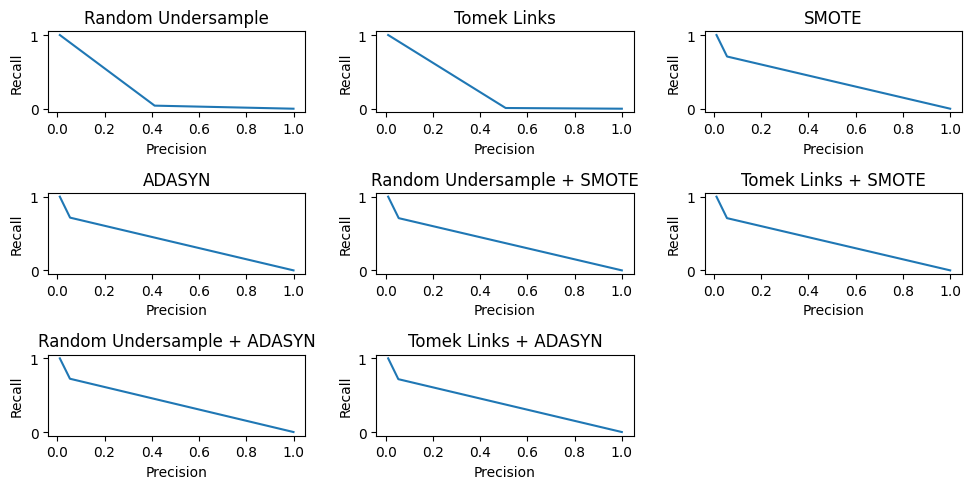

In [194]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))

# iterate over the function list and add a subplot for each function
for idx, x in enumerate(pr_auc_pts.items(), start=1):  
    resampler = x[0]
    v = x[1]
    ax = fig.add_subplot(3, 3, idx) # plot with 2 rows and 3 columns
    ax.plot(v[0],v[1])
    ax.set_title(resampler)
    ax.set_ylabel('Recall')
    ax.set_xlabel('Precision')
    

# add spacing between subplots
fig.tight_layout()